# Question-1: Technical Indicators
![](title_pict/technical_ind.png)

## Title
The Effects of Technical Indicators on Stock Price Prediction

## Abstract
Technical indicators are widely used by investors to conduct technical analysis, interpret stock price behavior, and identify potential patterns in financial data. They are often employed to determine optimal entry and exit points for trades. Beyond their role in trading strategies, technical indicators can also serve as input features for machine learning models aimed at predicting future stock prices and market direction.

In Alzaman, the author utilized only four indicators, Moving Average (MA), Exponential Moving Average (EMA), Moving Average Convergence Divergence (MACD), and Relative Strength Index (RSI). However, the literature includes a wide range of additional indicators, such as Percentage Price Oscillator (PPO), Stochastic Oscillator, Standard Deviation, On-Balance Volume (OBV), and Williams %R, which may also be leveraged as features.

This project will incorporate multiple sets of technical indicators as input features and evaluate their impact on the predictive performance of LSTM models, building upon the framework presented in Alzaman. By systematically comparing different combinations of indicators, the study aims to assess their effectiveness and contribution to improving model accuracy and reliability in stock price forecasting.


# Technical Indicators
A *technical indicator* for stocks is a mathematical calculation based on price, volume, or open interest of a security, used to analyze and predict future price movements. Traders and analysts use these indicators to identify trends, measure momentum, detect volatility, and generate buy or sell signals. Technical indicators are a central part of technical analysis, which focuses on market behavior rather than intrinsic value.


A *non-technical indicator* in the stock market is any factor that affects prices but does not come from past price or volume data. Instead, it is based on real-world conditions. For example, unemployment rates and inflation data show the health of the economy, while Federal Reserve interest rate decisions directly influence borrowing costs and investor confidence. These indicators help explain stock movements beyond what charts and technical analysis can show.

## Moving Average
A moving average is a statistical method used to calculate the mean of a specified number of consecutive observations on a rolling basis. In this approach, the average is computed for each successive group of values, with the window shifting forward by one observation at a time. This technique is widely applied in fields such as economics, finance, and healthcare for smoothing data and identifying underlying trends.

Window Length: In financial markets, the most common window lengths are 50-day and 200-day moving averages, which are widely used by analysts and traders to identify medium- and long-term trends in stock prices.

**Advantages of using a moving average include:**

- Noise reduction: Noise refers to random, short-term fluctuations or irregular variations in data that do not represent meaningful information. By smoothing these variations, a moving average makes underlying patterns more visible.

- Trend identification: It highlights long-term directional movements in data.

- Simplicity: It is computationally straightforward and easy to interpret.

**Disadvantages of using a moving average include:**

- Moving averages are based on past data, so they react slowly to sudden changes or new trends.

- Important short-term variations may be smoothed out along with noise, causing significant information to be lost.

- The choice of window length can significantly affect the results; too short a window may not reduce noise effectively, while too long a window may over-smooth the data.

**Example:** In hospitals, new patient admissions that occur during weekends are often recorded and reported on Mondays. As a result, the number of new patients reported on Mondays appears unusually high, even though it does not reflect actual daily variation. By applying a moving average, these irregular spikes are smoothed, providing a more accurate representation of patient inflow over time.

**Comparison of Short and Long MA**

Let's compare the moving averages with window lengths of 20 and 200 for Apple stock closing values.

```python
import yfinance as yf 
START, END = '2015-1-1', '2020-12-31'
df = yf.Ticker('AAPL').history(start=START, end=END)
df.head()
```

If the code above does not work due to a YFRateLimitError, you can load the data from the following URL using the pandas read_csv() method.

In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasmp/datasets/refs/heads/main/apple_stock_data_raw.csv',
                parse_dates = ['Date'])
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 05:00:00+00:00,24.718174,24.729270,23.821672,24.261047,212818400,0.0,0.0
2015-01-05 05:00:00+00:00,24.030267,24.110154,23.391177,23.577578,257142000,0.0,0.0
2015-01-06 05:00:00+00:00,23.641929,23.839426,23.218087,23.579796,263188400,0.0,0.0
2015-01-07 05:00:00+00:00,23.788380,24.010286,23.677426,23.910429,160423600,0.0,0.0
2015-01-08 05:00:00+00:00,24.238858,24.886824,24.121246,24.829128,237458000,0.0,0.0


In [11]:
df.reset_index(inplace=True)
df['Date'] = df.Date.dt.date
df.set_index('Date', inplace=True)
df.head().round(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,24.72,24.73,23.82,24.26,212818400,0.0,0.0
2015-01-05,24.03,24.11,23.39,23.58,257142000,0.0,0.0
2015-01-06,23.64,23.84,23.22,23.58,263188400,0.0,0.0
2015-01-07,23.79,24.01,23.68,23.91,160423600,0.0,0.0
2015-01-08,24.24,24.89,24.12,24.83,237458000,0.0,0.0


In [12]:
import pandas as pd
df_apple = pd.DataFrame(df.Close)
df_apple.head()

,Close
Date,
2015-01-02,24.261047
2015-01-05,23.577578
2015-01-06,23.579796
2015-01-07,23.910429
2015-01-08,24.829128


In [13]:
df_apple['MA-2'] = df_apple.Close.rolling(2).mean()
df_apple.head()

,Close,MA-2
Date,,
2015-01-02,24.261047,NaN
2015-01-05,23.577578,23.919312
2015-01-06,23.579796,23.578687
2015-01-07,23.910429,23.745112
2015-01-08,24.829128,24.369779


In [14]:
df_apple['MA-3'] = df_apple.Close.rolling(3).mean()
df_apple.head()

,Close,MA-2,MA-3
Date,,,
2015-01-02,24.261047,NaN,NaN
2015-01-05,23.577578,23.919312,NaN
2015-01-06,23.579796,23.578687,23.806140
2015-01-07,23.910429,23.745112,23.689267
2015-01-08,24.829128,24.369779,24.106451


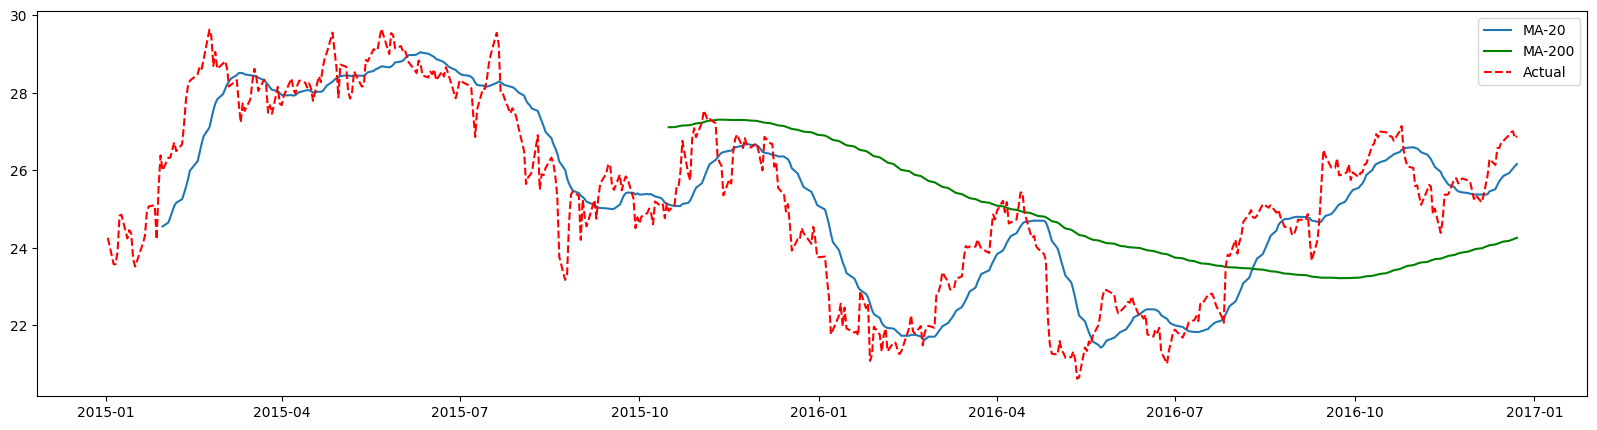

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
N = 500
plt.plot(df_apple.Close.rolling(20).mean()[:N], label='MA-20')
plt.plot(df_apple.Close.rolling(200).mean()[:N], label='MA-200', c='g')
plt.plot(df_apple.Close[:N], 'r--',label='Actual')
plt.legend();

## Exponential Moving Average
In this type of moving average, the effect of the recent values is greater than that of the older values. This is done by assigning weights to each day; these weights are multiplied by the corresponding stock prices and divided by the sum of all weights.
For the values 100,120,170, the ordinary average is $\frac{100+120+170}{3}=130$
If we use the weights 2,3,5, then: $\frac{100\times 2+ 120\times 3 + 170\times 5}{2+3+5} = \frac{1410}{10}=141$

Since the weight for the most recent value (170) is larger, its effect is greater, and the exponential moving average is larger than the regular moving average.

As a simple example, consider the stock prices in order: 100,110,90,105,95. If the period is chosen as 3 and the weights are 2,3,5, then for each 3 consecutive values the weighted moving average is computed as follows:

$\displaystyle \frac{100\times 2+ 110\times 3 + 90\times 5}{2+3+5} = \frac{980}{10}=98$

$\displaystyle \frac{110\times 2+ 90\times 3 + 105\times 5}{2+3+5} = \frac{1015}{10}=101.5$

$\displaystyle \frac{90\times 2+ 105\times 3 + 95\times 5}{2+3+5} = \frac{970}{10}=97$

In a pandas DataFrame, the ewm() method is used to calculate the exponential moving average. ewm stands for exponentially weighted moving average. For this function there is no fixed window size. 

If the adjust parameter of the ewm() method is set to True, to calculate the exponentially weighted value at time step $y_t$, all previous time step values $[x_0, x_1, ...,x_t]$ are used as follows:

$\displaystyle y_t = \frac{x_t+(1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+...+(1-\alpha)^tx_{o}}{1+(1-\alpha)+(1-\alpha)^2+...+(1-\alpha)^{t-1}}$

Thw weights are $1, (1-\alpha), (1-\alpha)^2, ..., (1-\alpha)^{t-1}$ where $\alpha$ is the smoothing factor between 0 and 1.



In [91]:
df_apple2 = pd.DataFrame(df_apple.Close)
df_apple2.head()

,Close
Date,
2015-01-02,24.261047
2015-01-05,23.577578
2015-01-06,23.579796
2015-01-07,23.910429
2015-01-08,24.829128


- As $\alpha$ gets closer to 1, the ewm values get closer to the actual values. Therefore, large alpha values correspond to shorter exponential moving averages, whereas small alpha values correspond to longer moving averages.

In [94]:
df_apple2['EWM_0_1'] = df_apple2.Close.ewm(alpha=0.3).mean()
df_apple2['EWM_0_5'] = df_apple2.Close.ewm(alpha=0.5).mean()
df_apple2['EWM_0_9'] = df_apple2.Close.ewm(alpha=0.9).mean()
df_apple2.head().round(2)

,Close,EWM_0_1,EWM_0_5,EWM_0_9
Date,,,,
2015-01-02,24.26,24.26,24.26,24.26
2015-01-05,23.58,23.86,23.81,23.64
2015-01-06,23.58,23.73,23.68,23.59
2015-01-07,23.91,23.80,23.80,23.88
2015-01-08,24.83,24.17,24.33,24.73


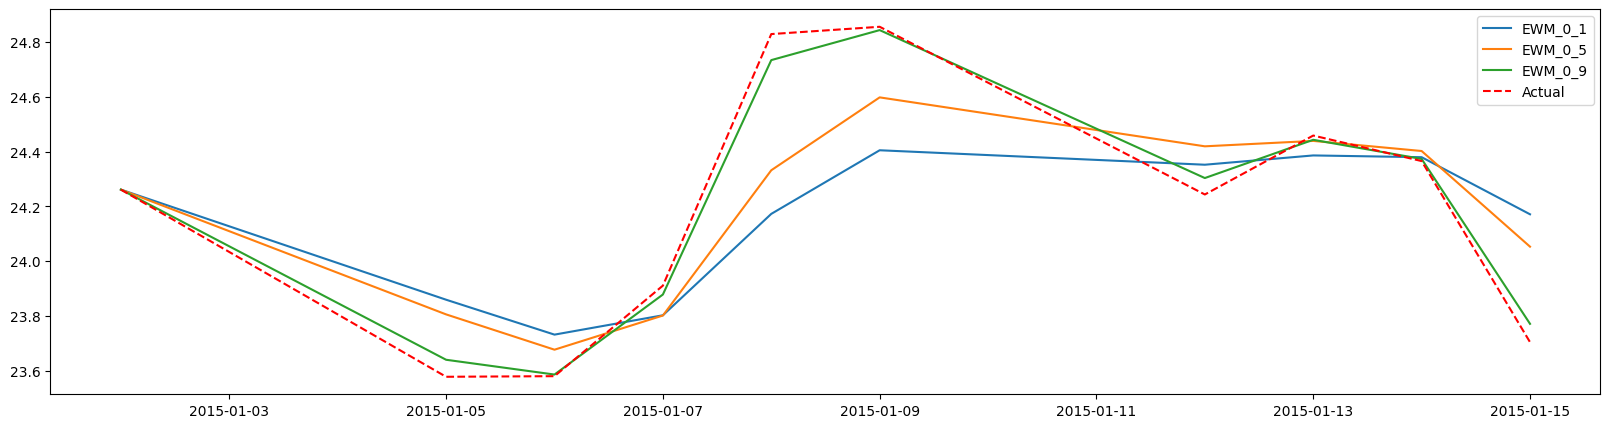

In [98]:
plt.figure(figsize=(20,5))
N = 10
plt.plot(df_apple2['EWM_0_1'][:N], label='EWM_0_1')
plt.plot(df_apple2['EWM_0_5'][:N], label='EWM_0_5')
plt.plot(df_apple2['EWM_0_9'][:N], label='EWM_0_9')
plt.plot(df_apple2.Close[:N], 'r--',label='Actual')
plt.legend();

## Moving Average Convergence Divergence 

Moving Average Convergence Divergence (MACD) is the difference between the shorter  exponential moving average and the longer one.  It is common to choose 12 and 26 day EMA.  You can use the span parameter of the ewm() method to get larger and smaller alpha values.

$\alpha = \displaystyle \frac{2}{1+span}$

Large span --> smaller $\alpha$ --> slower decay --> EWM becomes smoother (longer-term average)

Small span --> larger  $\alpha$ --> fast   decay --> EWM reacts more to recent data (short-term average)

Let's choose span values 12 and 26.

In [100]:
df_apple3 = pd.DataFrame(df_apple.Close)
df_apple3.head()

,Close
Date,
2015-01-02,24.261047
2015-01-05,23.577578
2015-01-06,23.579796
2015-01-07,23.910429
2015-01-08,24.829128


In [102]:
df_apple3['EWM_span_12'] = df_apple3.Close.ewm(span=12).mean()
df_apple3['EWM_span_26'] = df_apple3.Close.ewm(span=26).mean()
df_apple3.head().round(2)

,Close,EWM_span_12,EWM_span_26
Date,,,
2015-01-02,24.26,24.26,24.26
2015-01-05,23.58,23.89,23.91
2015-01-06,23.58,23.77,23.79
2015-01-07,23.91,23.81,23.82
2015-01-08,24.83,24.09,24.06


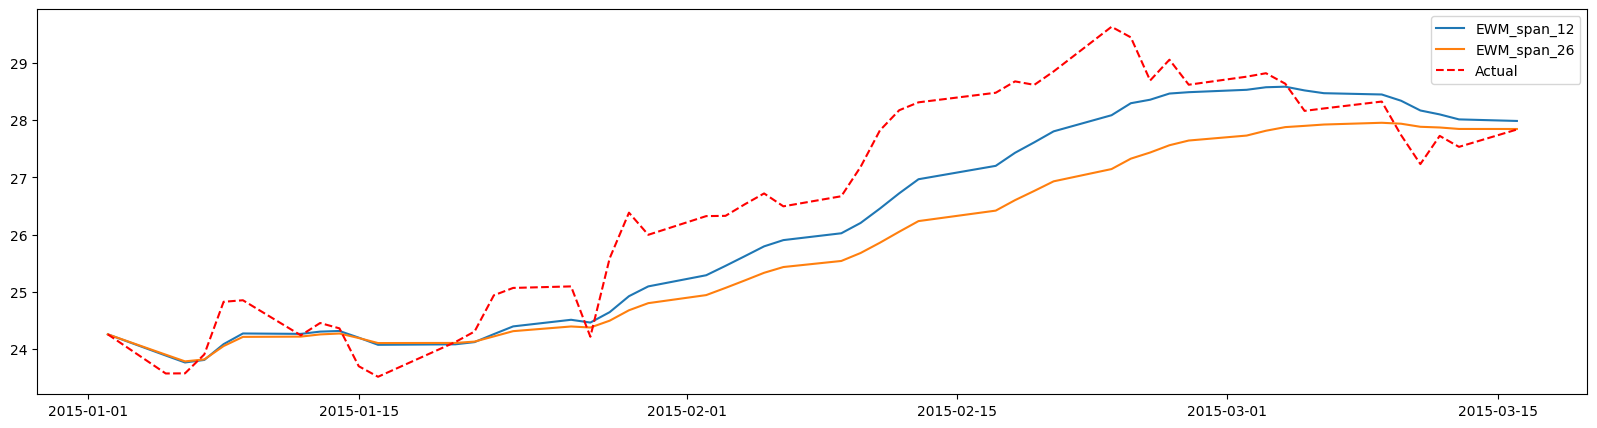

In [106]:
plt.figure(figsize=(20,5))
N = 50
plt.plot(df_apple3['EWM_span_12'][:N], label='EWM_span_12')
plt.plot(df_apple3['EWM_span_26'][:N], label='EWM_span_26')
plt.plot(df_apple3.Close[:N], 'r--',label='Actual')
plt.legend();

## Relative Strength Index

Relative Strength Index (RSI) measures how strongly a stock’s price has moved in recent periods. It helps identify whether a stock is overbought or oversold.  RSI value is between 0 and 100.

RSI > 70: Overbought
RSI < 30: Oversold

Overbought means the price of the stock has increased too quickly or too much compared to its recent movement. This indicates unusually strong buying pressure, and a price correction (pullback) could happen soon.

Oversold means the price of the stock has decreased too quickly or too much compared to its recent movement. This indicates unusually strong selling pressure, and a price correction (pullback) could happen soon.


$RSI = 100-\frac{100}{1+RS}$ where $\displaystyle RS=\frac{Average\,\,gain\,\,over\,\,a\,\,period}{Average\,\,loss\,\,over\,\,a\,\,period}$ is the Relative strength

It is very common to choose a period of 14.

In [126]:
df_apple4 = pd.DataFrame(df_apple.Close)
df_apple4.head()

,Close
Date,
2015-01-02,24.261047
2015-01-05,23.577578
2015-01-06,23.579796
2015-01-07,23.910429
2015-01-08,24.829128


In [128]:
df_apple4['diff'] = df_apple4.diff()
df_apple4.head()

,Close,diff
Date,,
2015-01-02,24.261047,NaN
2015-01-05,23.577578,-0.683470
2015-01-06,23.579796,0.002218
2015-01-07,23.910429,0.330633
2015-01-08,24.829128,0.918699


In [140]:
import numpy as np

df_apple4['gain'] =  np.where(df_apple4['diff']>0,df_apple4['diff'],0)
df_apple4['loss'] = -np.where(df_apple4['diff']<0,df_apple4['diff'],0)
df_apple4.head()

,Close,diff,gain,loss
Date,,,,
2015-01-02,24.261047,NaN,0.000000,-0.00000
2015-01-05,23.577578,-0.683470,0.000000,0.68347
2015-01-06,23.579796,0.002218,0.002218,-0.00000
2015-01-07,23.910429,0.330633,0.330633,-0.00000
2015-01-08,24.829128,0.918699,0.918699,-0.00000


In [144]:
df_apple4['gain_average_14'] =  df_apple4['gain'].rolling(14).mean()
df_apple4['loss_average_14'] =  df_apple4['loss'].rolling(14).mean()
df_apple4.iloc[10:15]

,Close,diff,gain,loss,gain_average_14,loss_average_14
Date,,,,,,
2015-01-16,23.519882,-0.184181,0.000000,0.184181,NaN,NaN
2015-01-20,24.125687,0.605804,0.605804,-0.000000,NaN,NaN
2015-01-21,24.309868,0.184181,0.184181,-0.000000,NaN,NaN
2015-01-22,24.942297,0.632429,0.632429,-0.000000,0.208274,0.159613
2015-01-23,25.071005,0.128708,0.128708,-0.000000,0.217467,0.159613


In [150]:
RS = df_apple4['gain_average_14']/df_apple4['loss_average_14']
df_apple4['RSI'] =  100-(100/(1+RS))
df_apple4.iloc[10:15]

,Close,diff,gain,loss,gain_average_14,loss_average_14,RSI
Date,,,,,,,
2015-01-16,23.519882,-0.184181,0.000000,0.184181,NaN,NaN,NaN
2015-01-20,24.125687,0.605804,0.605804,-0.000000,NaN,NaN,NaN
2015-01-21,24.309868,0.184181,0.184181,-0.000000,NaN,NaN,NaN
2015-01-22,24.942297,0.632429,0.632429,-0.000000,0.208274,0.159613,56.613540
2015-01-23,25.071005,0.128708,0.128708,-0.000000,0.217467,0.159613,57.671326


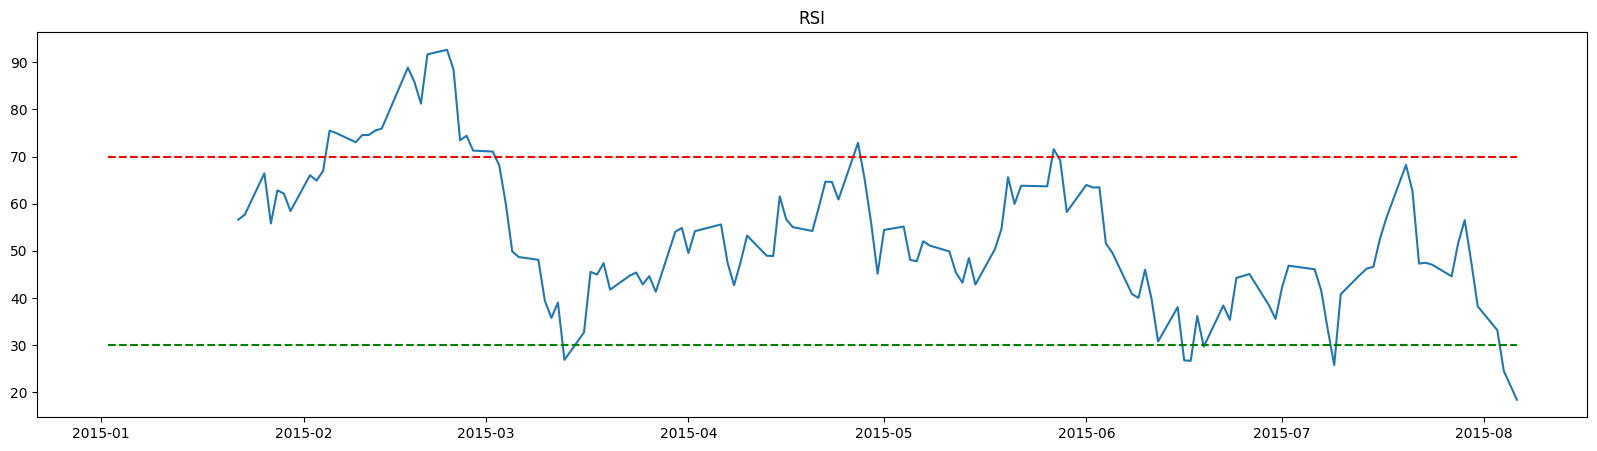

In [166]:
plt.figure(figsize=(20,5))
N = 150
plt.plot(df_apple4['RSI'][:N])
plt.hlines(70, df_apple4.index[0], df_apple4.index[N-1], color='red', linestyle='--')
plt.hlines(30, df_apple4.index[0], df_apple4.index[N-1], color='green', linestyle='--')
plt.title('RSI');